<a href="https://colab.research.google.com/github/SaiManikantaBollam/NLP_Project/blob/main/tf_idf_text_classification_of_corona_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [13]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

Corona=pd.read_csv('/content/Corona_NLP_train.csv',encoding='latin1')

Corona.Sentiment.replace(to_replace='Extremely Positive', value='Positive',inplace=True)
Corona.Sentiment.replace(to_replace='Extremely Negative', value='Negative',inplace=True)
print(Corona.Sentiment.value_counts())
Corona = Corona[['OriginalTweet','Sentiment']]
Corona.head(10)

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64


,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Negative
5,As news of the regionÂs first confirmed COVID...,Positive
6,Cashier at grocery store was sharing his insig...,Positive
7,Was at the supermarket today. Didn't buy toile...,Neutral
8,Due to COVID-19 our retail store and classroom...,Positive
9,"For corona prevention,we should stop to buy th...",Negative


In [14]:
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words("english")
def clean_text(text):
    text = text.lower()
    # remove mentions
    text = re.sub("@\S+", " ", text)
    # remove url
    text = re.sub("https*\S+", " ", text)
    # remove hashtags
    text = re.sub("#\S+", " ", text)
    # remove all numbers
    text = re.sub("\d", " ", text)
    # remove punctuations
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    # remove extra spaces
    text = re.sub('\n', ' ', text)
    text = re.sub('\s{2,}',' ', text)
    # stopwords
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    # remove non-Latin characters
    text = re.sub('[^a-zA-Z\s]', '', text)
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
Corona.OriginalTweet=Corona.OriginalTweet.apply(clean_text)

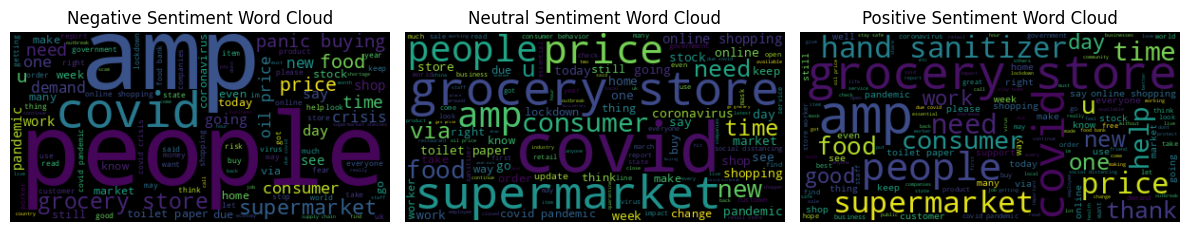

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

negative_text = ' '.join(Corona[Corona.Sentiment == 'Negative'].OriginalTweet.tolist())
neutral_text = ' '.join(Corona[Corona.Sentiment == 'Neutral'].OriginalTweet.tolist())
positive_text = ' '.join(Corona[Corona.Sentiment == 'Positive'].OriginalTweet.tolist())

# Create WordCloud objects for each sentiment
negative_wordcloud = WordCloud().generate(negative_text)
neutral_wordcloud = WordCloud().generate(neutral_text)
positive_wordcloud = WordCloud().generate(positive_text)

# Create subplots for negative, neutral, and positive word clouds
plt.figure(figsize=(12, 8))

# Negative Word Cloud
plt.subplot(131)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')

# Neutral Word Cloud
plt.subplot(132)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Neutral Sentiment Word Cloud')
plt.axis('off')

# Positive Word Cloud
plt.subplot(133)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')

# Show the subplots
plt.tight_layout()
plt.show()

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

tfidf=TfidfVectorizer()
X_transformed=tfidf.fit_transform(Corona.OriginalTweet)
X_transformed

X_train, X_test, y_train, y_test = train_test_split(X_transformed, Corona.Sentiment, test_size=0.2)

In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def eval_model(y_true,y_predicted):
    cm = confusion_matrix(y_true, y_predicted)
    cm_display=ConfusionMatrixDisplay(confusion_matrix = cm)
    cm_display.plot()
    print('accuracy score',accuracy_score(y_true, y_predicted))
    print(classification_report(y_true,y_predicted))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy score 0.8114674441205053
              precision    recall  f1-score   support

    Negative       0.83      0.82      0.82      3139
     Neutral       0.76      0.66      0.71      1539
    Positive       0.82      0.87      0.84      3554

    accuracy                           0.81      8232
   macro avg       0.80      0.78      0.79      8232
weighted avg       0.81      0.81      0.81      8232



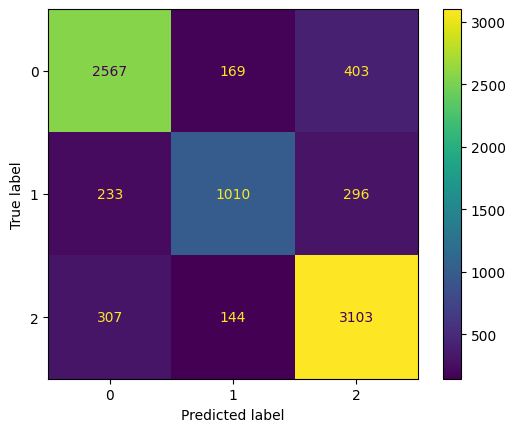

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


eval_model(y_test, y_pred)

accuracy score 0.6728620019436345
              precision    recall  f1-score   support

    Negative       0.71      0.72      0.71      3139
     Neutral       0.76      0.18      0.29      1539
    Positive       0.64      0.85      0.73      3554

    accuracy                           0.67      8232
   macro avg       0.70      0.58      0.58      8232
weighted avg       0.69      0.67      0.64      8232



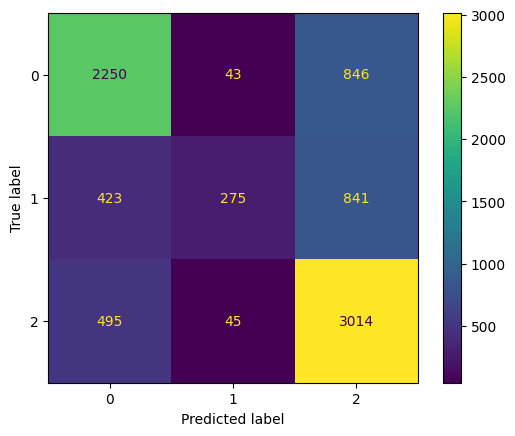

In [20]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB(alpha=0.25)
nb_model.fit(X_train, y_train)

nb_y_pred = nb_model.predict(X_test)

eval_model(y_test, nb_y_pred)